# Uber Trips Analysis



### by Adebayo Okeyode

### Introduction

* This data set contains 1028136 rows of Uber trips with 4 variables on each trip, including latitude, longitude,   Date/Time, and Base. See this data dictionary to understand the dataset's variables.

### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
ubr_data = pd.read_csv('uber.csv')

In [3]:
ubr_data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
ubr_data.shape

(1028136, 4)

In [5]:
ubr_data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
ubr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [7]:
ubr_data.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [8]:
ubr_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

### ASSESSING THE DATA

In [9]:
ubr_data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [10]:
ubr_data.sample(5)

,Date/Time,Lat,Lon,Base
5925,9/5/2014 19:46:00,40.7663,-73.9570,B02512
98082,9/9/2014 5:16:00,40.7204,-73.9927,B02598
127490,9/12/2014 14:13:00,40.7492,-73.9943,B02598
664585,9/3/2014 12:44:00,40.7740,-73.8726,B02682
974896,9/24/2014 6:29:00,40.7852,-73.9751,B02764


In [11]:
ubr_data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [12]:
ubr_data.duplicated().sum()

24037

In [13]:
ubr_data.Lat.value_counts()

40.7740    3553
40.7741    3121
40.6448    3083
40.7739    2622
40.6447    2493
           ... 
40.5562       1
40.5675       1
41.0138       1
40.9369       1
40.9942       1
Name: Lat, Length: 5135, dtype: int64

In [14]:
ubr_data.Lon.value_counts()

-73.9888    2684
-73.9889    2581
-73.9918    2556
-73.9922    2427
-74.0056    2385
            ... 
-74.2997       1
-73.0971       1
-74.2045       1
-73.4117       1
-74.2278       1
Name: Lon, Length: 7724, dtype: int64

In [15]:
ubr_data['Date/Time'].value_counts()

9/13/2014 18:44:00    82
9/13/2014 18:41:00    80
9/13/2014 18:45:00    78
9/18/2014 19:01:00    78
9/27/2014 23:40:00    75
                      ..
9/3/2014 3:24:00       1
9/4/2014 1:33:00       1
9/4/2014 1:44:00       1
9/2/2014 2:40:00       1
9/30/2014 3:26:00      1
Name: Date/Time, Length: 42907, dtype: int64

In [16]:
ubr_data.Base.value_counts()

B02617    377695
B02598    240600
B02682    197138
B02764    178333
B02512     34370
Name: Base, dtype: int64

### OBSERVATION

* Convert 'Date/Time' to datetime
* Extract Day, Weekday and Hour from Date/Time

### DATA CLEANING

In [17]:
# Making copies of my data

ubr_clean = ubr_data.copy()

In [18]:
ubr_clean.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


#### ISSUE

* Converting 'Date/TIme' from string to datetime

In [19]:
ubr_clean['Date/Time'] = ubr_clean['Date/Time'].map(pd.to_datetime)

#### TEST

In [20]:
ubr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


#### ISSUE

* Extract Day, Weekday and Hour from Date/Time

In [21]:
ubr_clean['Day'] = ubr_clean['Date/Time'].apply(lambda x: x.day)
ubr_clean['Weekday'] = ubr_clean['Date/Time'].apply(lambda x: x.weekday())
ubr_clean['Hour'] = ubr_clean['Date/Time'].apply(lambda x: x.hour)

#### TEST

In [22]:
ubr_clean.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [23]:
ubr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Day        1028136 non-null  int64         
 5   Weekday    1028136 non-null  int64         
 6   Hour       1028136 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 54.9+ MB


In [24]:
ubr_clean.shape

(1028136, 7)

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Day', ylabel='Density'>

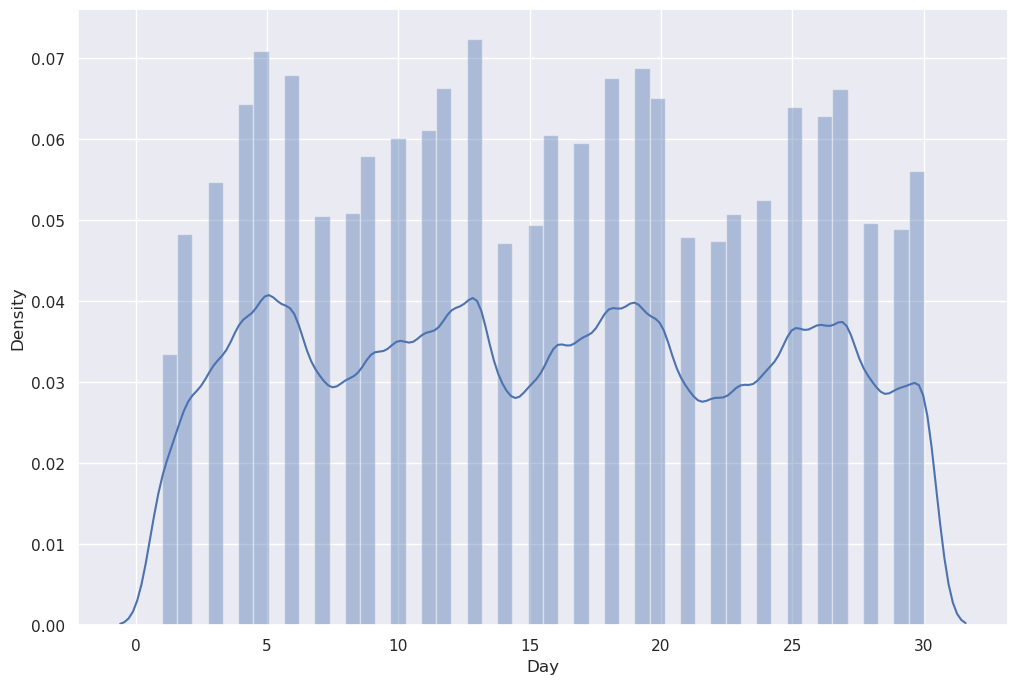

In [25]:
# I'm using the Uber trips for the September month so let’s have a look 
# at each day to see on which day the Uber trips were highest
    
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(ubr_clean['Day'])

##### Observation

* By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends

<AxesSubplot:xlabel='Hour', ylabel='Density'>

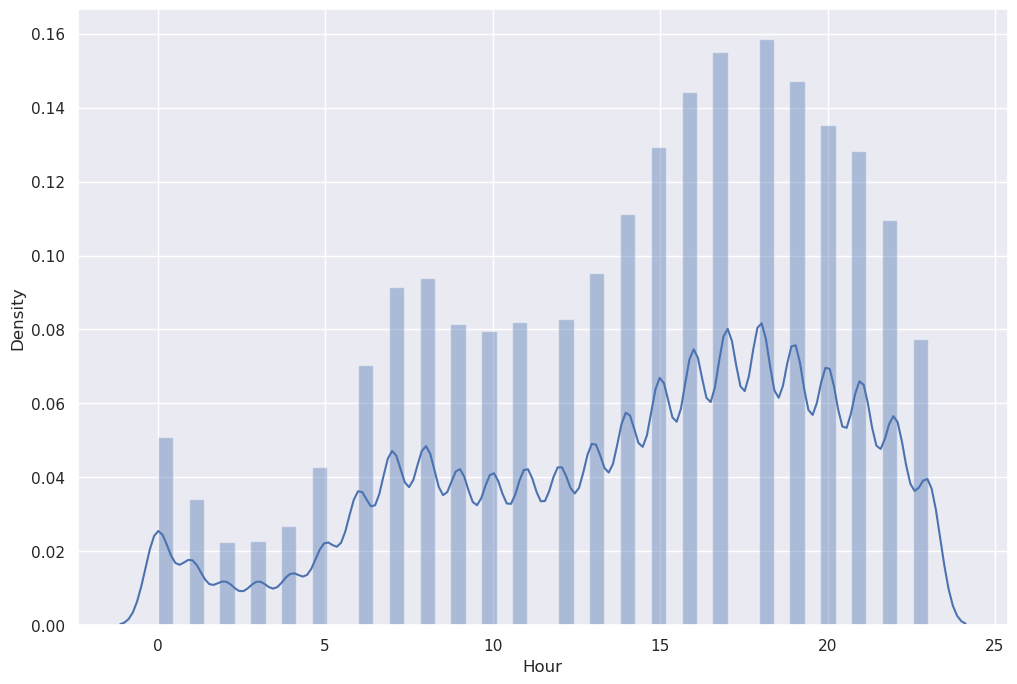

In [26]:
# Let’s have a look at each day to see on which day the Uber trips were highest

sns.distplot(ubr_clean['Hour'])

##### Observation

* According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing

<AxesSubplot:xlabel='Weekday', ylabel='Density'>

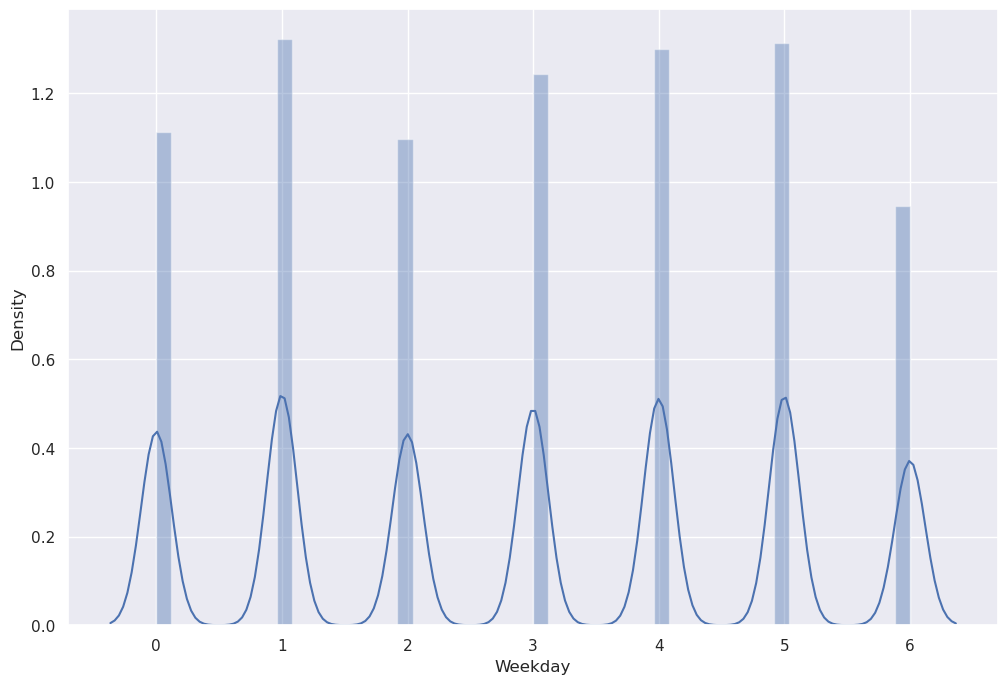

In [27]:
# Now let’s analyze the Uber trips according to the hours

sns.distplot(ubr_clean['Weekday'])

##### Observation

* In the above figure 0 indicates Sunday, on Sundays the Uber trips are more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

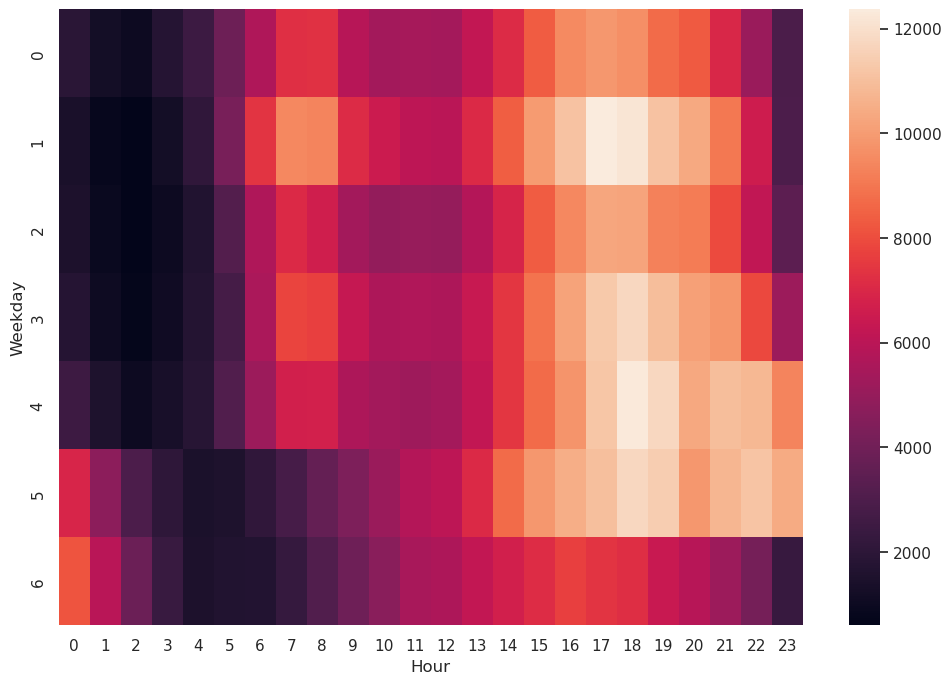

In [28]:
# Correlation of Weekday and Hour

cor = ubr_clean.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
cor = cor.unstack()
sns.heatmap(cor, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


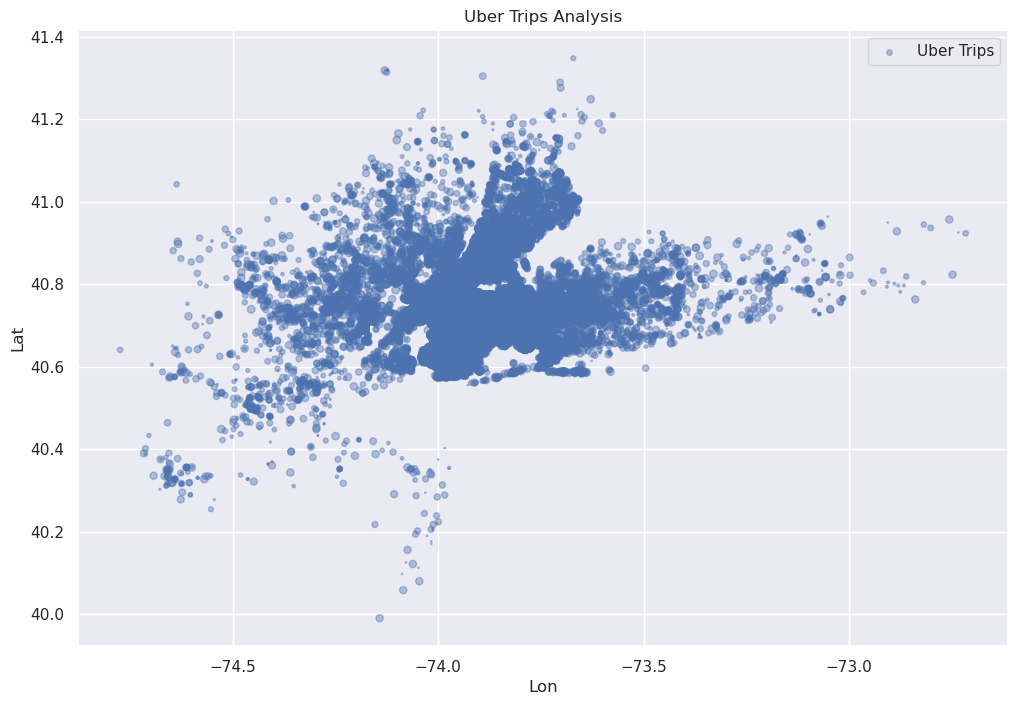

In [29]:
# Trips according to location

ubr_clean.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=ubr_clean['Day'], label='Uber Trips', figsize=(12, 8), 
              cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

### Summary of my findings

* Some of the conclusions that I got from this analysis are:

    * Monday is the most profitable day for Uber
    * On Saturdays less number of people use Uber
    * 6 pm is the busiest day for Uber
    * On average a rise in Uber trips start around 5 am.
    * Most of the Uber trips originate near the Manhattan region in New York.